In [1]:
import pandas as pd
import numpy as np
from transliterate import translit
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

categories = pd.read_csv("raw_data/sess_item_categories.csv")
#titles = pd.read_csv("../combine_models/data/sess_titles.csv")

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [7]:
import pickle

with open("data/reverse_mapping.pkl", "rb") as handle:
    mapping = pickle.load(handle)

In [11]:
categories['itemid'] = categories['itemid'].astype(str).map(mapping)

In [12]:
def translit_en(x):
    try:
        tr = translit(x, 'ru', reversed=True)
        return tr
    except:
        #print(x)
        return None

categories['category_name_1_level_en'] = categories['category_name_1_level'].parallel_apply(translit_en)
categories['category_name_2_level_en'] = categories['category_name_2_level'].parallel_apply(translit_en)

In [14]:
#categories['itemid'] = categories.itemid.astype(str)

In [15]:
categories.drop(['category_id_1_level','category_id_2_level','category_name_1_level','category_name_2_level','catalogid'],axis=1,inplace=True)

In [16]:
categories.head()

,itemid,category_name_1_level_en,category_name_2_level_en
0,1037267,Knigi,Bukinistika
1,965617,Knigi,Hudozhestvennaja literatura
2,965617,Knigi,Bukinistika
3,627638,Knigi,Bukinistika
4,627638,Knigi,Nehudozhestvennaja literatura


In [18]:
categories.to_pickle("data/categories.pkl")

In [9]:
import seaborn as sns

In [13]:
val_cnt=categories['category_name_2_level_en'].value_counts()

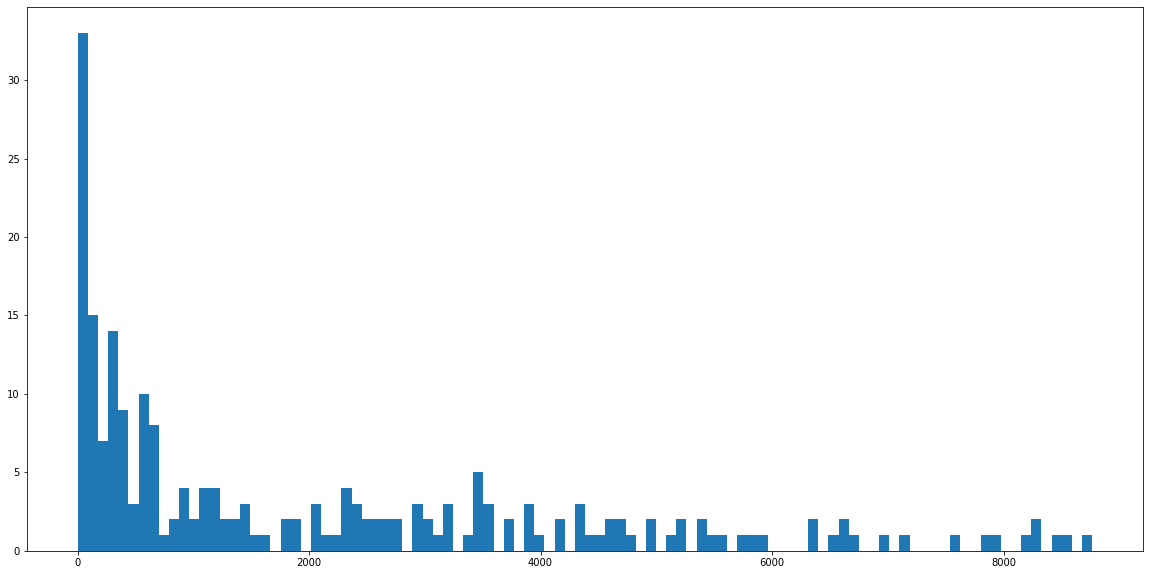

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
plt.hist(val_cnt.values[50:], bins=100);

In [27]:
val_cnt

Zhenschinam                                   264492
Detjam                                        188052
Muzhchinam                                    108139
Posuda                                         98829
Igrushki i igry                                89491
                                               ...  
Podpiski na elektronnye knigi i audioknigi         2
Oblachnye hranilischa                              2
Zakolki dlja volos                                 1
Zaponki                                            1
Oborudovanie dlja salonov krasoty                  1
Name: category_name_2_level_en, Length: 264, dtype: int64

In [12]:
#categories.to_pickle("categories.pkl")

,itemid,catalogid,category_name_1_level_en,category_name_2_level_en
0,100197,16546,Knigi,Bukinistika
1,1287542,33046,Knigi,Hudozhestvennaja literatura
2,1287542,33078,Knigi,Bukinistika
3,1337842,33083,Knigi,Bukinistika
4,1337842,40021,Knigi,Nehudozhestvennaja literatura
